In [ ]:
!pip install Replicate
!pip install langchain_community

In [ ]:
from google.colab import userdata
import os

api_token = userdata.get("api_token")

os. environ["REPLICATE_API_TOKEN"] = api_token

In [ ]:
from langchain_community.llms import Replicate

classification_parameters = {
    "top_k": 5,
    "top_p": 1.0,
    "max_tokens": 50,
    "min_tokens": 0,
    "random_seed": None,
    "repetition_penalty": 1.0,
    "temperature": 0,
    "stopping_criteria": "length (50 tokens)",
    "stopping_sequence": None
}

summarization_paramaters = {
    "top_k": 5,
    "top_p": 1.0,
    "max_tokens": 400,
    "min_tokens": 0,
    "random_seed": None,
    "repetition_penalty": 1.0,
    "temperature": 0,
    "stopping_criteria": "length (400 tokens)",
    "stopping_sequence": None
}

combined_parameters = {**classification_parameters, **summarization_paramaters}

llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    input=combined_parameters
)

In [ ]:
review_text = [
    "I don't like the way cashier treat me when I buy coffee there"
    "I love this coffee shop but they don't have prayer place"
    "The coffee shop is cozy and the service is good"
]

In [ ]:
classification_test = llm.invoke(
    input = f"""
    Please clasify the review from the customer into positive, negative, or neutral.
    Review. And please explain with 3 lable to be easy to read.
    {review_text}
    """, config=classification_parameters
)

summarization_test = llm.invoke(
    input = f"""
    Please summarize the review from the customer into one sentence.
    Review. And please explain with 3 lable to be easy to read.
    {review_text}
    """, config=summarization_paramaters
)

print(classification_test)
print(summarization_test)


1. Sentiment: Negative
   - Reason: The customer expresses dislike for the treatment received from the cashier.

2. Sentiment: Neutral
   - Reason: The customer's love for the coffee shop is balanced by the absence of a prayer place, which is a personal preference rather than a negative comment about the shop's overall quality.

3. Sentiment: Positive
   - Reason: The customer appreciates the coziness of the coffee shop and the quality of service.
1. Customer Dissatisfaction with Service: The customer expresses dissatisfaction with the cashier's treatment during coffee purchases.
2. Positive Assessment of Coffee Shop: Despite the service issue, the customer adores the coffee shop's ambiance.
3. Missing Facility: The customer notes the absence of a prayer place in the shop.

Summary: The customer appreciates the cozy atmosphere and quality of coffee but is displeased with the cashier's behavior and misses a prayer place in the shop.


In [ ]:
!pip install pandas
!pip install -U langchain langchain_community langchain_experimental Replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 3.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/capstone project firda/reviews_data.csv")
df

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...
...,...,...,...,...,...,...
845,Becky,"Agoura Hills, CA","Reviewed July 13, 2006",NaN,I ordered two venti frappacino's without whipp...,['No Images']
846,Bob,"Goodrich, MI","Reviewed Jan. 3, 2005",NaN,No Review Text,['No Images']
847,Erik,"Valley Village, CA","Reviewed Nov. 5, 2004",NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...",['No Images']
848,Andrew,"Fallbrook, CA","Reviewed Oct. 20, 2004",NaN,No Review Text,['No Images']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


EDA Before Cleaning

In [ ]:
df.head()

df.info()

df.shape

df.isnull().sum()

df.describe(include="all")

df.duplicated().sum()

df.drop_duplicates()

df['Rating'].value_counts()

df['Review'].sample(3).values

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         850 non-null    object 
 1   location     850 non-null    object 
 2   Date         850 non-null    object 
 3   Rating       705 non-null    float64
 4   Review       850 non-null    object 
 5   Image_Links  850 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.0+ KB


,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...
...,...,...,...,...,...,...
845,Becky,"Agoura Hills, CA","Reviewed July 13, 2006",NaN,I ordered two venti frappacino's without whipp...,['No Images']
846,Bob,"Goodrich, MI","Reviewed Jan. 3, 2005",NaN,No Review Text,['No Images']
847,Erik,"Valley Village, CA","Reviewed Nov. 5, 2004",NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...",['No Images']
848,Andrew,"Fallbrook, CA","Reviewed Oct. 20, 2004",NaN,No Review Text,['No Images']


Missing Value (Before Cleaning)

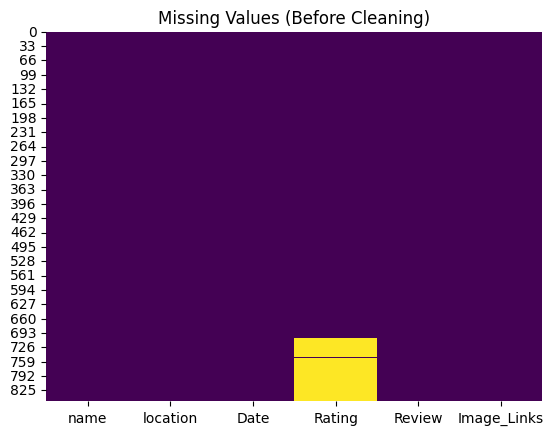

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values (Before Cleaning)")
plt.show()

Rating Distribution (Before Cleaning)

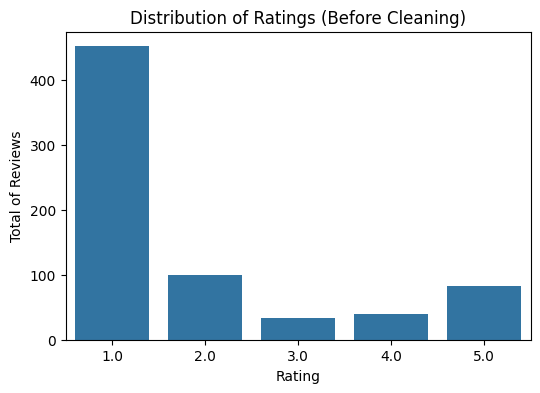

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt. figure(figsize=(6,4))
sns.countplot(data=df, x="Rating")
plt.title("Distribution of Ratings (Before Cleaning)")
plt.xlabel("Rating")
plt.ylabel("Total of Reviews")
plt.show()

Top Locations with High Rating (Before Cleaning)

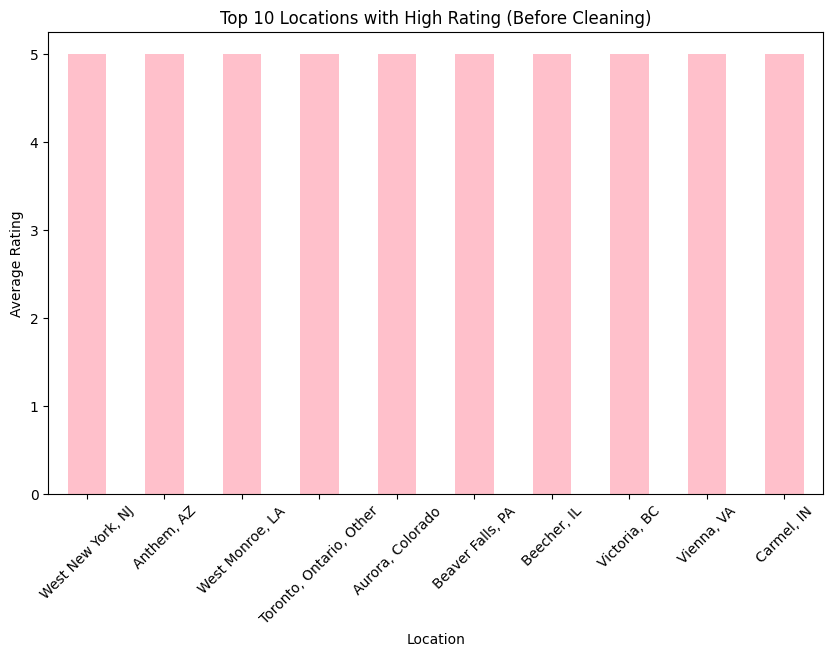

In [ ]:
avg_rating = df.groupby('location')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
avg_rating.plot(kind='bar', color='pink')
plt.title("Top 10 Locations with High Rating (Before Cleaning)")
plt.xlabel("Location")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

Top Locations by Number of Reviews

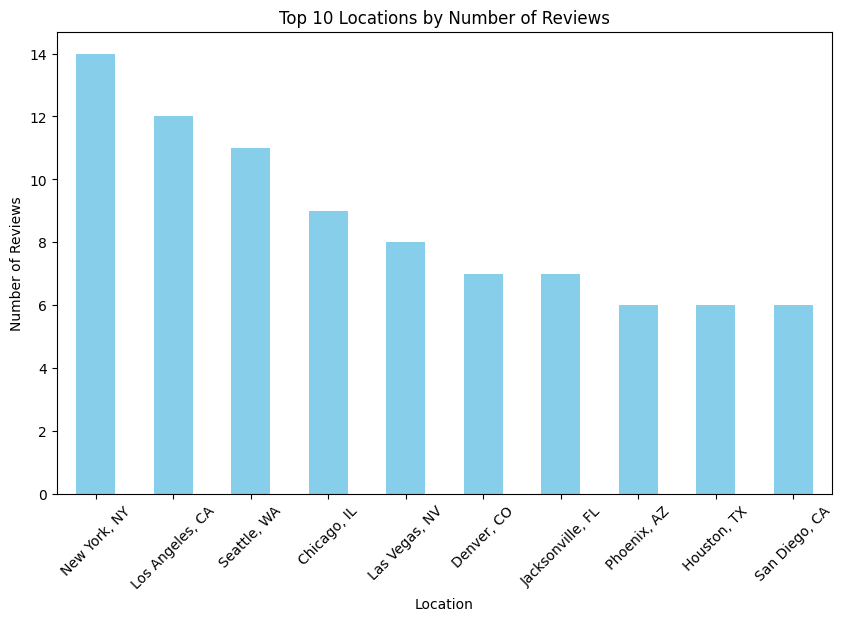

In [ ]:
top_locations = df['location'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_locations.plot(kind='bar', color='skyblue')
plt.title("Top 10 Locations by Number of Reviews")
plt.xlabel("Location")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()

In [ ]:
import locale
import pandas as pd

locale.setlocale(locale.LC_TIME, 'en_US.UTF-8')

df = pd.read_csv("/content/drive/MyDrive/capstone project firda/reviews_data.csv")

if "Image_Links" in df.columns:
  df = df.drop(columns=["Image_Links"])

df = df.dropna(subset=["Review"])

df = df[df["Review"].str.lower() != "No Review Text"]

df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")

df = df.dropna(subset=["Rating"])

df["Date_processed"] = df["Date"].str.replace("Reviewed ", "", regex=False).str.strip()

print(df["Date_processed"].head().tolist())

df["Date"] = pd.to_datetime(df["Date_processed"], format="%b. %d, %Y", errors="coerce")

print(df["Date_processed"].head().tolist())

df["Date"] = pd.to_datetime(df["Date_processed"], errors="coerce")

df = df.drop(columns=["Date_processed"])

df = df.drop_duplicates()

df = df.reset_index(drop=True)

df.to_csv("reviews_data_clean.csv")

df

['Sept. 13, 2023', 'July 16, 2023', 'July 5, 2023', 'May 26, 2023', 'Jan. 22, 2023']
['Sept. 13, 2023', 'July 16, 2023', 'July 5, 2023', 'May 26, 2023', 'Jan. 22, 2023']


/tmp/ipython-input-1068037734.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date_processed"], errors="coerce")


,name,location,Date,Rating,Review
0,Helen,"Wichita Falls, TX",2023-09-13,5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,"Apopka, FL",2023-07-16,5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,"Cranberry Twp, PA",2023-07-05,5.0,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA",2023-05-26,5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,"Gresham, OR",2023-01-22,5.0,I’m on this kick of drinking 5 cups of warm wa...
...,...,...,...,...,...
700,Margaret,"Cotati, CA",2011-10-02,1.0,I ordered Via Starbucks coffee online. I recei...
701,Ric,"Oakville, ON",2011-08-31,3.0,"My name is Ric **, I am journalist by professi..."
702,Jayne,"Ny, NY",2011-08-24,1.0,"The bagel was ice cold, not cut and not toasted."
703,Norma,"La Puente, CA",2011-08-15,1.0,"In the morning of Monday, August 15, 2011, at ..."


In [ ]:
df.info()

df.head()

print("Ukuran dataset setelah cleaning:", df.shape)

print("Jumlah missing values per kolom:\n", df.isnull().sum())

print("Jumlah duplikat data:", df.duplicated().sum())

df.to_csv("reviews_data_clean.csv")

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   name      705 non-null    object        
 1   location  705 non-null    object        
 2   Date      705 non-null    datetime64[ns]
 3   Rating    705 non-null    float64       
 4   Review    705 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 27.7+ KB
Ukuran dataset setelah cleaning: (705, 5)
Jumlah missing values per kolom:
 name        0
location    0
Date        0
Rating      0
Review      0
dtype: int64
Jumlah duplikat data: 0


,name,location,Date,Rating,Review
0,Helen,"Wichita Falls, TX",2023-09-13,5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,"Apopka, FL",2023-07-16,5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,"Cranberry Twp, PA",2023-07-05,5.0,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA",2023-05-26,5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,"Gresham, OR",2023-01-22,5.0,I’m on this kick of drinking 5 cups of warm wa...
...,...,...,...,...,...
700,Margaret,"Cotati, CA",2011-10-02,1.0,I ordered Via Starbucks coffee online. I recei...
701,Ric,"Oakville, ON",2011-08-31,3.0,"My name is Ric **, I am journalist by professi..."
702,Jayne,"Ny, NY",2011-08-24,1.0,"The bagel was ice cold, not cut and not toasted."
703,Norma,"La Puente, CA",2011-08-15,1.0,"In the morning of Monday, August 15, 2011, at ..."


Missing Value (After Cleaning)

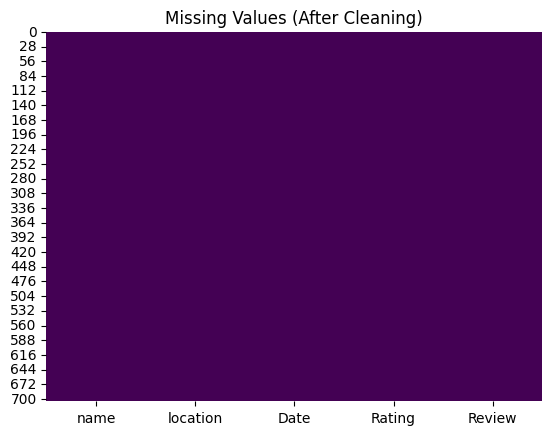

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values (After Cleaning)")
plt.show()

Distribusi Rating (After Cleaning)

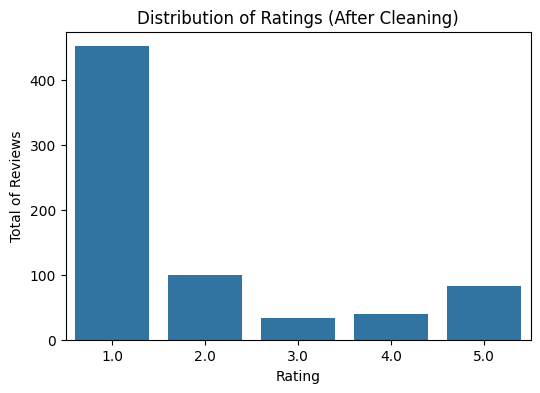

In [ ]:
plt. figure(figsize=(6,4))
sns.countplot(data=df, x="Rating")
plt.title("Distribution of Ratings (After Cleaning)")
plt.xlabel("Rating")
plt.ylabel("Total of Reviews")
plt.show()

Top Locations with High Rating (After Cleaning)

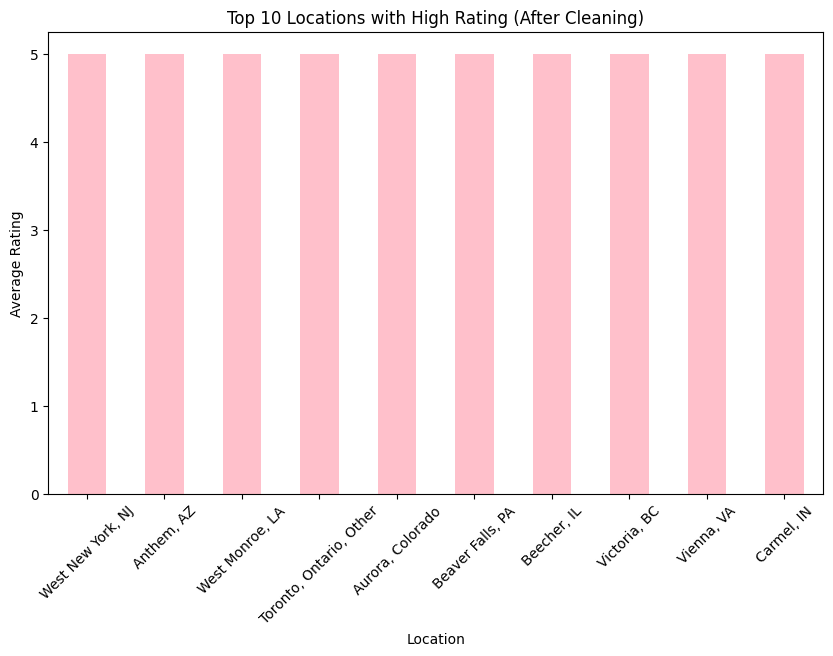

In [ ]:
avg_rating = df.groupby('location')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
avg_rating.plot(kind='bar', color='pink')
plt.title("Top 10 Locations with High Rating (After Cleaning)")
plt.xlabel("Location")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

Review Trends per Month (After Cleaning)

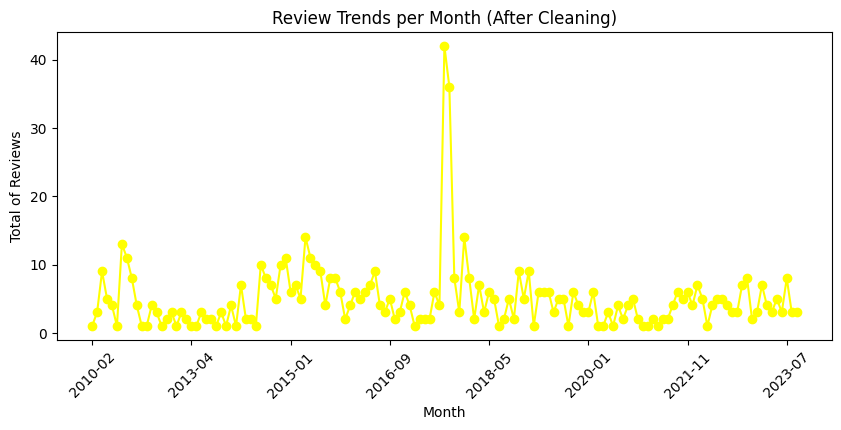

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df = df.dropna(subset=['Date'])
df['Month'] = df['Date'].dt.to_period('M')
reviews_by_month = df.groupby('Month').size()

plt.figure(figsize=(10,4))
reviews_by_month.index = reviews_by_month.index.astype(str)
reviews_by_month.plot(kind="line", marker="o", color="yellow")
plt.title("Review Trends per Month (After Cleaning)")
plt.xlabel("Month")
plt.ylabel("Total of Reviews")
plt.xticks(rotation=45)
plt.show()

Top Locations by Number of Reviews

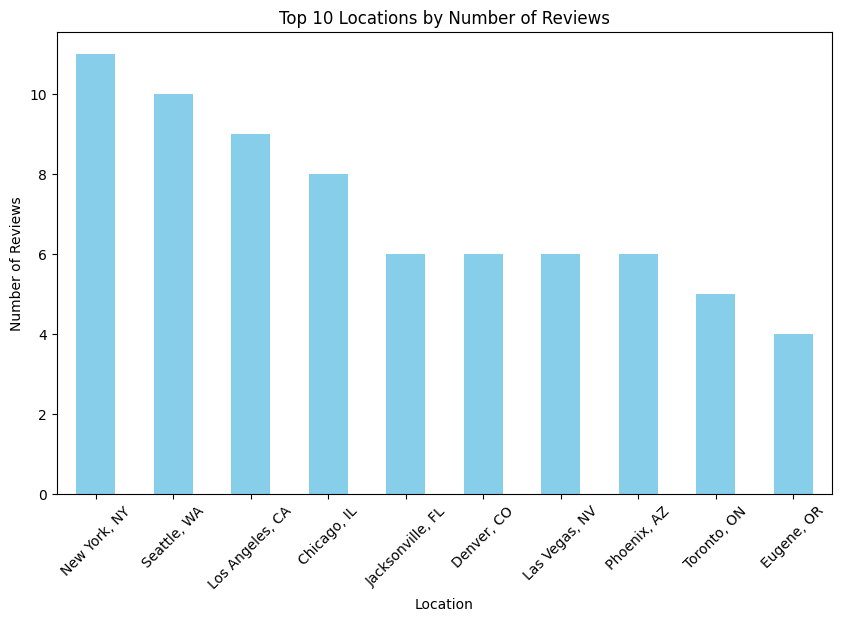

In [ ]:
top_locations = df['location'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_locations.plot(kind='bar', color='skyblue')
plt.title("Top 10 Locations by Number of Reviews")
plt.xlabel("Location")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()

Sentiment Classification

In [ ]:
import replicate

client = replicate.Client(api_token="xxxxxxxxxxxxxxxxxxxx")

def classify_sentiment(text):
    try:
        output = client.run(
            "ibm-granite/granite-3.3-8b-instruct",
            input={"prompt": f"Classify the sentiment of this review as Positive, Neutral, or Negative:\n\n{text}"}
        )
        result = "".join(output).strip()

        if "positive" in result.lower():
            return "Positive"
        elif "negative" in result.lower():
            return "Negative"
        elif "neutral" in result.lower():
            return "Neutral"
        else:
            return result
    except Exception as e:
        return f"Error: {e}"

In [ ]:
df['Sentiment'] = df['Review'].apply(classify_sentiment)

print(df[['Review', 'Sentiment']])


                                                Review Sentiment
0    Amber and LaDonna at the Starbucks on Southwes...  Positive
1    ** at the Starbucks by the fire station on 436...  Positive
2    I just wanted to go out of my way to recognize...  Positive
3    Me and my friend were at Starbucks and my card...  Positive
4    I’m on this kick of drinking 5 cups of warm wa...  Positive
..                                                 ...       ...
700  I ordered Via Starbucks coffee online. I recei...  Negative
701  My name is Ric **, I am journalist by professi...  Positive
702   The bagel was ice cold, not cut and not toasted.  Negative
703  In the morning of Monday, August 15, 2011, at ...  Positive
704  I found the coffee at Starbucks overrated and ...  Positive

[705 rows x 2 columns]


Sentiment Distribution

In [ ]:
sentiment_summary = df["Sentiment"].value_counts().reset_index()
sentiment_summary.columns = ["Sentiment", "Count"]
print(sentiment_summary)

  Sentiment  Count
0  Negative    549
1  Positive    152
2   Neutral      4


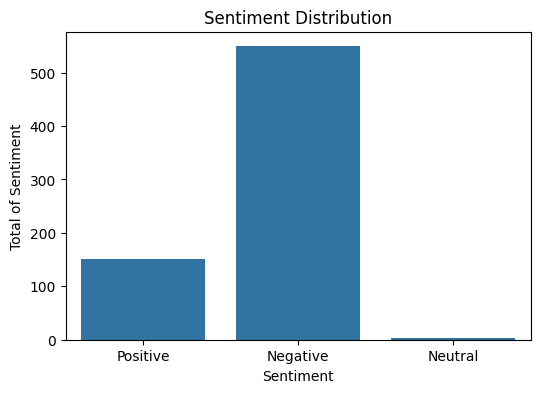

In [ ]:
plt. figure(figsize=(6,4))
sns.countplot(data=df, x="Sentiment")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Total of Sentiment")
plt.show()

Summerization

In [ ]:
from tqdm import tqdm

df["Summary"] = ""

for i in tqdm(range(len(df))):
    review = df.loc[i, "Review"]
    prompt = f"Summarize this customer review briefly:\n\n{review}"
    try:
        summary = llm(prompt)
        df.at[i, "Summary"] = summary
    except Exception as e:
        df.at[i, "Summary"] = "Error"
        print(f"Error at index {i}: {e}")

df.to_csv("starbucks_reviews_with_summary.csv", index=False)

100%|██████████| 705/705 [19:41<00:00,  1.68s/it]


In [ ]:
print("Contoh hasil summarization:\n")
print(df[["Review", "Summary"]].sample(5, random_state=42))

output_file = "starbucks_reviews_with_summary.csv"
df.to_csv(output_file, index=False)

print(f"\nDataset berhasil disimpan ke: {output_file}")


Contoh hasil summarization:

                                                Review  \
478  I am very good customer for the Starbucks. I w...   
81   I ordered 2 mint Frappuccino and it was not fr...   
77   The first time after years I felt the “welcome...   
208  The fact that you don’t even allow a one week ...   
319  I shop at Starbucks on a daily basis. I have a...   

                                               Summary  
478  The customer, a frequent Starbucks patron, had...  
81   The customer ordered two frozen mint Frappucci...  
77   This customer review expresses excitement abou...  
208  The customer expresses dissatisfaction with St...  
319  The customer frequents Starbucks daily, expres...  

Dataset berhasil disimpan ke: starbucks_reviews_with_summary.csv


**Insight and Finding**

- Berdasarkan hasil analisis sentimen dapat ditarik kesimpulan bahwa mayoritas review merupakan review negatif yang mana terdapat 549 review negatif dari keseluruhan total 705 review.
- Sedangkan review positif hanya terdapat 142, sedangkan netral hanya 4.
- Dapat disimpulkan bahwa review positif memiliki pola seperti pelanggan memuji kualitas minuman yang ada di starbuck, suasana dan tempat yang nyaman, serta beberapa dari review menyebutkan menu favorit pelanggan.
- Sedangkan review negatif cenderung memiliki pola yang mayoritas keluhan terkait
  - pelayanan yang kurang cepat,
  - staff yang kurang ramah dengan pelanggan,
  - kondisi tempat yang kurang bersih atau kurang nyaman.
- Pada tahapan summarization dari analisis ini adalah sebagian besar ringkasan review pelanggan menyebutkan bahwa faktor utama kepuasan dan ketidakpuasan pelanggan adalah dilihat dari pelayanan dan suasana starbuck.



**Conclusion**

Melalui analisis ditemukan bahwa mayoritas review pelanggan Starbucks dalam dataset ini adalah negatif (±79%). Sisanya adalah review positive sekitar 20% dan sisanya adalah netral. Disamping itu pada tahapan summarization menunjukkan bahwa kualitas sikap dan pelayanan staff serta kondisi kenyamanan starbuck merupakan faktor utama penentu kepuasan dan ketidakpuasan pelanggan

**Recommendation**

Melalui analisis tersebut terdapat beberapa faktor yang perlu diperbaiki yang mana diantaranya adalah diperlukannya untuk fokus pada faktor pelayanan seperti Starbucks perlu meningkatkan kecepatan dan kecekatan pelanggan dan alangkah lebih baik memberikan pelatihan kepada staff seperti pelatihan hospitality. Disamping itu juga perlu memperhatikan kondisi Starbuck seperti kebersihan tempat serta kenyamanan itu sangat diperlukan agar pelanggan merasa puas dan berkunjung kembali. Dikarenakan salah satu dari review positif terkait menu starbuck maka sangat diperlukan mempertahankan cita rasa dan kualitas menu dan jika terdapat menu baru lebih baik meminta feedback atau review dari pelanggan untuk mengetahui apa yang perlu diperbaiki dari menu baru tersebut, itu dapat membantu dalam mempertahankan kualitas menu. Dan yang terakhir adalah rajin mengecek feedback atau review pelanggan terkait starbuck agar dapat dengan cepat mengatasi kekurangan dan serta keluhan atau protes dari pelanggan dan juga dapat melihat review positif agar mengetahui apa yang harus dipertahankan dari brand atau starbuck itu sendiri.


**AI Support Explanation**

Project menggunakan IBM Granite Instruct yang mana membantu dalam mengklasifikasi (classification) dan meringkas (summarization) data. Pada tahap klasifikasi ini, AI membantu mengklasifikasikan review dalam tiga bagian yaitu positive, negative dan neutral. Disamping itu untuk tahap ringkasan atau summarization ini AI membantu dalam meringkas dan mereview kalimat atau feedback pelanggan agar lebih mudah untuk dipahami terutama dalam memahami pola feedback pelanggan. Ditambah lagi dengan data 705 ini dapat dianalisis dengan cepat berkat AI ini sehingga menjadi lebih efisien.


